# Imaging with R2D2

## Description
The R2D2 algorithm takes a hybrid structure between a Plug-and-Play algorithm and a learned version of the well known Matching Pursuit algorithm. Its reconstruction is formed as a series of residual images, iteratively estimated as outputs of iteration-specific Deep Neural Networks (DNNs) taking the previous iteration’s image estimate and associated data residual as inputs. R2D2's primary application is to solve inverse problems in synthesis imaging by interferometry (SII). The details of R2D2 are discussed in the following papers.

>[1] Aghabiglou, A., Chu, C. S., Dabbech, A. & Wiaux, Y., [The R2D2 deep neural network series paradigm for fast precision imaging in radio astronomy](https://doi.org/10.3847/1538-4365/ad46f5), ApJS 273(1), 3.
>
>[2] Dabbech, A., Aghabiglou, A., Chu, C. S. & Wiaux, Y., [CLEANing Cygnus A deep and fast with R2D2](https://doi.org/10.3847/2041-8213/ad41df), ApJL 966(2), L34.
> 

In this tutorial, we focus on a [Python implementation of R2D2](https://github.com/basp-group/R2D2-SII) for small-scale monochromatic intensity imaging in SII from the environment setup, to imaging.

## SII Inverse Problem

The SII imaging inverse problem can be formulated as:

$$ \boldsymbol{y} = \boldsymbol{\Phi \bar{x}} + \boldsymbol{n},$$

where  $\boldsymbol{y} \in \mathbb{C}^M$  is the measurement vector,  $\boldsymbol{\bar{x}} \in \mathbb{R}^N$  is the unknown radio image,  $\boldsymbol{\Phi} \in \mathbb{C}^{N \times M}$ is the measurement operator corresponding to incomplete Fourier sampling, and  $\boldsymbol{n} \in \mathbb{C}^M$  is a realisation of a white Gaussian noise with standard deviation  $\tau > 0$  and mean $0$.

The SII inverse problem can be formulated in the image domain via back-projection of the measurements using the adjoint of the measurement operator $\boldsymbol{\Phi}^\dagger$. 
The image-domain data, known as the dirty image, reads:

$$ \boldsymbol{x}_{\textrm{d}} = \kappa \textrm{Re}\{ \boldsymbol{\Phi}^\dagger \boldsymbol{y}\} = \kappa \textrm{Re}\{ \boldsymbol{\Phi}^\dagger \boldsymbol{\Phi} \bar{x}+ \boldsymbol{\Phi}^\dagger \boldsymbol{n}\},$$ 

where  $\textrm{Re}\{ \cdot \} $ denotes the real part of its arugment, and  $\kappa>0 $ is a normalisation factor ensuring the maximum value of the point spread function (PSF), given by  $\kappa \textrm{Re} \{\boldsymbol{\Phi}^\dagger \boldsymbol{\Phi} \boldsymbol{\delta}\} $, is equal to $1$, with  $\boldsymbol{\delta} $ denoting the image with value $1$ at its center pixel and $0$ otherwise.

## R2D2's Iteration Structure

The R2D2 algorithm consists of a series of $I$ DNNs interleaved with $I-1$ data consistency layers. Each DNN $\boldsymbol{N}_{\widehat{\boldsymbol{\theta}}^{(i)}}$, parametrised by $\widehat{\boldsymbol{\theta}}^{(i)}$, takes the previous iteration's image estimate and associated residual dirty image as input. The image estimate and residual dirty image are initialised such that $\boldsymbol{x}^{(0)} = \boldsymbol{0}$ and $\boldsymbol{r}^{(0)} = \boldsymbol{x}_{\textrm{d}}$.

At each iteration $i \leq I$, the residual dirty image is given by:

$\boldsymbol{r}^{(i-1)} =  \boldsymbol{x}_{\textrm{d}} - \kappa \textrm{Re} \{ \boldsymbol{\Phi}^\dagger\boldsymbol{\Phi} \} \boldsymbol{x}^{(i-1)}$.

The image estimate is then updated from the output of the DNN $\boldsymbol{N}_{\widehat{\boldsymbol{\theta}}^{(i)}}$ as:

$\boldsymbol{x}^{(i)} = \boldsymbol{x}^{(i-1)} + \boldsymbol{N}_{\widehat{\boldsymbol{\theta}}^{(i)}}(\boldsymbol{x}^{(i-1)}, \boldsymbol{r}^{(i-1)})$.

The R2D2 algorithm takes multiple variants:
- **R2D2**, a DNN series whose DNNs take the well knwon U-Net architecture. 
- **R2D2-Net**, an end-to-end DNN, unrolling the R2D2 algorithm itself. Its architecture consists of $J$ U-Net layers, interleaved with $J-1$ approximate data consistency layers.
- **R3D3**, a DNN series whose DNNs take the R2D2-Net architecture. R3D3 is short for ''Russian Doll R2D2'' in reference to its nesting structure.

## R2D2 Repository & Dependencies

To start with, install virtual environment and the Jupyter notebook in your preferred terminal. Set up the directory of the virtual environment to be installed, named here as `r2d2_env`:


python -m venv r2d2_env

Then, activate the virtual environment by running command below outside the Jupyter Notebook in your terminal:

- On **macOS/Linux**:

source r2d2_env/bin/activate

- On **Windows**:

.\r2d2_env\Scripts\activate

Install Jupyter using:

pip install jupyter ipykernel

Add the virtual environment to Jupyter as a new kernel:

python -m ipykernel install --user --name=r2d2_env --display-name "R2D2_env"

Start Jupyter Notebook by running:

jupyter notebook

Select the new kernel in Jupyter:
- Open your Jupyter notebook.
- Go to Kernel -> Change kernel -> R2D2_env.

Clone the repository to the current directory by running the command below in your preferred terminal:

In [ ]:
!git clone https://github.com/basp-group/R2D2-SII.git
%cd ./R2D2-SII

PyTorch and torchvision should be installed as per the guidelines of [PyTorch](https://pytorch.org/get-started/locally/) to ensure the latest version compatible with your CUDA version is installed. If your CUDA version is older than 11.8, then, refer to these [guidelines](https://pytorch.org/get-started/previous-versions/).
 
- For example, to install PyTorch with CUDA version 11.6 (OS: **Linux/Windows**), use the command below:

In [ ]:
!pip install torch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1!pip install torch==1.13.1+cu116 torchvision==0.14.1+cu116 --extra-index-url https://download.pytorch.org/whl/cu116

- On **macOS**:

In [ ]:
!pip install torch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1

All other required Python packages are listed in the [requirements](requirements.txt) file. Python version `3.10` or higher is required.
   
Install the packages using the command below:


In [ ]:
!pip install -r requirements.txt

## Pre-trained R2D2 variants

The pre-trained variants of the R2D2 algorithm are available at the [DOI:10.17861/99cbe654-5071-4625-b59d-a26c790cbeb4](https://researchportal.hw.ac.uk/en/datasets/r2d2-deep-neural-network-series-for-radio-interferometric-imaging). 
 
They are trained using Fourier sampling patterns from the VLA (combining its configurations A and C) for the formation of images of size $N = 512 \times 512$, under the following imaging settings:
- a pixel size corresponding to a super-resolution factor of $1.5$ (see Section: [Imaging with R2D2](#imaging) for details),
- Briggs weighting  with Briggs (robust) parameter $0$ is applied to the measurements.

The pre-trained variants are:

- R2D2 series composed of $I=15$ U-Nets,
- R3D3 series composed of $I=7$ R2D2-Nets, each with $J=3$ U-Net layers,
- R3D3 series composed of $I=8$ R2D2-Nets, each with $J=6$ U-Net layers.

The R2D2-Net variant of the R2D2 algorithm corresponds to the first DNN of the R3D3 series. 

In this tutorial, we focus on R2D2 series. Same instructions apply for R3D3 series and R2D2-Net. 

First, create the directory storing the pre-trained DNNs in the project directory:


In [ ]:
!mkdir ./ckpt


Then, download and unzip the compressed file of R2D2 DNN series:

In [ ]:
# desired R2D2 checkpoints dir.
r2d2_ckpt_path="./ckpt/v1_R2D2_15UNets/"
# Download R2D2 checkpoint
!wget https://researchportal.hw.ac.uk/files/110702953/v1_R2D2_15UNets.zip -P ./ckpt 
# Extract the files
!unzip ./ckpt/v1_R2D2_15UNets.zip -d ./ckpt
# Remove the zip file
!rm ./ckpt/v1_R2D2_15UNets.zip
# update dir. name
!mv ./ckpt/all $r2d2_ckpt_path

**Note**: Please note that the "wget" and "unzip" commands should be installed beforehand.

## Test dataset

In this tutorial, we provide a test dataset, located in `./data/3c353/`, composed of a ground truth in **.fits** format and its associated measurement file in **.mat** format. The ground truth is a post-processed image of the radio galaxy 3c353 of size $N = 512 \times 512$, which can be found in `./data/3c353/3c353_GTfits.fits`. The measurements are simulated using VLA antenna configurations A and C.

First, let us read and visualise the ground truth $\bar{\boldsymbol{x}}$ using the following Python code:

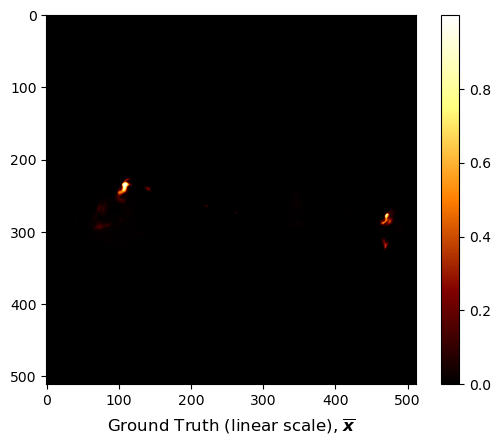

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
# Load ground truth image
gdth = fits.getdata('data/3c353/3c353_GTfits.fits')
# Plot ground truth image
fig, ax = plt.subplots()
pcm = ax.imshow(gdth, cmap='afmhot')
cb = plt.colorbar(pcm, ax=ax)
title = ax.set_title(r'Ground Truth (linear scale), $\overline{\boldsymbol{x}}$', y=-0.15)

Given the high dynamic range of the ground truth  $\bar{\boldsymbol{x}}$, only bright features are visible in linear scale. For a better visualisation, we map its pixel intensities to the logarithmic scale using the function:

$\textrm{rlog}(\bar{\boldsymbol{x}}) = \bar{\boldsymbol{x}}_{\textrm{max}} \log_{a}(\frac{a}{\bar{\boldsymbol{x}}_{\textrm{max}}} \bar{\boldsymbol{x}} + \boldsymbol{1}),$

where $a$ is its dynamic range, and $\bar{\boldsymbol{x}}_{\textrm{max}}$ is its maximum intensity value.  For the considered image,  $a = 10^5$ and $\bar{\boldsymbol{x}}_{\textrm{max}} = 1.0$.

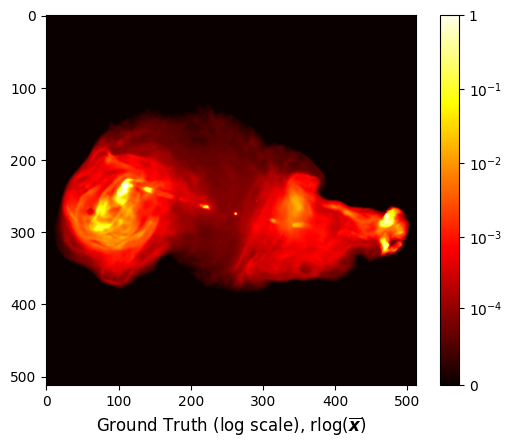

In [2]:
import numpy as np
import matplotlib.colors as colors

# Define rlog
class rlog(colors.Normalize):
    def __init__(self, a):
        self.a = a
        super().__init__(vmin=None, vmax=None, clip=False)
        
    def __call__(self, im):
        if len(im) == 0:
            return im
        im_max = np.max(im)
        if im_max < 1/self.a:
            return im
        else:
            return im_max * np.log10(self.a * im / im_max + 1) / np.log10(self.a)

    def inverse(self, im):
        return (self.a**(im) - 1) / self.a
# Image dynamic range
a = 1e5
# Plot image
fig, ax = plt.subplots()
pcm = ax.imshow(gdth, norm= rlog(a), cmap='hot')
cb = plt.colorbar(pcm, ax=ax)

ticks = [np.log10(a * tick + 1)/np.log10(a) for tick in [0, 1e-4, 1e-3, 1e-2, 1e-1, 1]]
ticks[-1] = 1
cb.set_ticks(ticks)
cb.set_ticklabels([0, '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '1'])
title = ax.set_title(r'Ground Truth (log scale), $\text{rlog}(\overline{\boldsymbol{x}})$', y=-0.15)

The test measurement file `./data/3c353/data_3c353.mat` associated with the above ground truth can be loaded using the following Python code:

In [3]:
from scipy.io import loadmat

# Load data
meas = loadmat('data/3c353/data_3c353.mat')
for k, v in meas.items():
    if not k.startswith('_'):
        if max(v.shape) == 1:
            print(f"{k}: {v.item():.4e}, {type(v.item())}")
        else:
            print(f"{k}: {v.shape}, {type(v)}")

frequency: 1.0000e+09, <class 'float'>
u: (209840, 1), <class 'numpy.ndarray'>
v: (209840, 1), <class 'numpy.ndarray'>
maxProjBaseline: 1.2216e+05, <class 'float'>
w: (209840, 1), <class 'numpy.ndarray'>
y: (209840, 1), <class 'numpy.ndarray'>
nW: 3.4893e+01, <class 'float'>
nWimag: (209840, 1), <class 'numpy.ndarray'>


The expected input variables are:
- `y`,  measurement/ data vector.
- `u`, $\boldsymbol{u}$ coordinates in units of the observation wavelength.
- `v`, $\boldsymbol{v}$ coordinates in units of the observation wavelength.
- `nW`, noise-whitening vector, known as the *natural weights*, corresponding to the inverse of the noise standard deviation. During imaging, these weights are applied to the measurements and injected into the measurement operator model.
- `nWimag`, imaging weight vector, compensating for the non-uniform Fourier sampling and enhancing the effective resolution of the observations. The vector is **optional** and can be computed directly in the R2D2 imager.
- `frequency`, the observation frequency in Hz.
- `maxProjBaseline`, the maximum projected baseline in units of the observation wavelength, formally defined as $\max\{\sqrt{\boldsymbol{u}^2 + \boldsymbol{v}^2}\}$. It represents **the spatial bandwidth of the Fourier sampling**.

The collection of the points $(\boldsymbol{u}, \boldsymbol{v})$ constitutes the 2D Fourier sampling pattern also known as the $uv$-coverage which can be visualised using the following Python code:

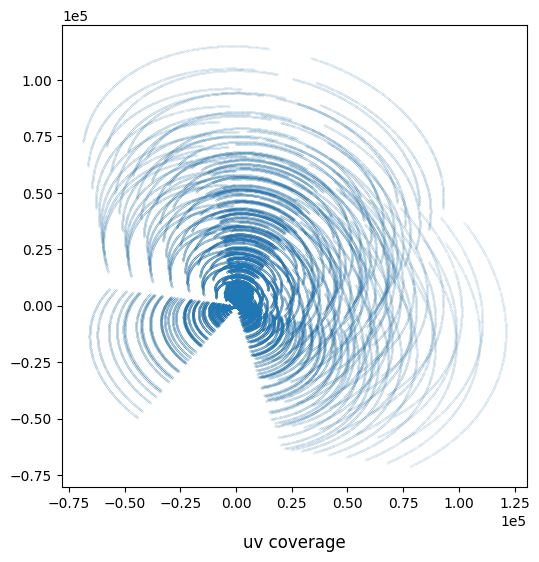

In [4]:
import matplotlib.pyplot as plt
# plot the 2D Fourier sampling pattern
fig, ax = plt.subplots(figsize=(6, 6))
pcm = ax.scatter(meas['u'], meas['v'], s=1e-3)
title = ax.set_title('uv coverage', y=-0.15)
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

**Scripts to generate [synthetic measurement files](https://github.com/basp-group/RI-measurement-operator/blob/eb4cf1ed6b8b10b5a64b7d4f5100c99c214e0da1/pyutils/sim_vla_ms.py) as well as to convert real [Measurement Sets (MS) to .mat files](https://github.com/basp-group/RI-measurement-operator/blob/eb4cf1ed6b8b10b5a64b7d4f5100c99c214e0da1/pyutils/ms2mat.py) readable by this repository are available.**

<a id='imaging'></a>
## Imaging with R2D2

R2D2 imager is launched via the Python file `./src/imager.py`. This file takes as input a configuration file in `.yaml` format, where all parameters involved in the imaging process, including the path to the input measurement file, are defined and set to default values where relevant.

The readers are directed to this [README](https://github.com/basp-group/R2D2-SII/blob/main/README.md) for more information on the content of the configuration file.

For this tutorial, we use the example configuration file `./config/imaging/R2D2.yaml`. The imager file also accepts **optional** name-argument pairs to overwrite corresponding fields in the configuration file.

The user **must** provide as input **the target image size** and **the super-resolution factor** in the configuration file.

The super-resolution factor is defined as the ratio between the spatial Fourier bandwidth of the target/ ground truth image and the bandwidth of the Fourier sampling pattern (i.e. the maximum projected baseline). The corresponding pixel size in **arcsecond** is then obtained as:


$\textrm{imPixelsize} = \frac{180 \times 3600}{\pi} \times \frac{1}{\textrm{superresolution} \times 2 \times \textrm{maxProjBaseline}}$

Under these settings, the R2D2 imager can be run by calling the following command from the terminal:

In [ ]:
!python ./src/imager.py --yaml_file ./config/imaging/R2D2.yaml

R3D3 can be easily run by changing the input parameters:

- `ckpt_path`: the directory containing the DNN checkpoints.
- `series`: the series variant, `R2D2` or `R3D3`, default to `R2D2`.
- `layers`: the number of  U-Net layers in the DNNs, $J$, default to 1.
- `num_iter`: the number of DNNs in the series,  $I$, default to 15.
 
R2D2-Net takes the same parameters as R3D3 except for the number of iterations which must be set to `num_iter=1`.

These parameters can be updated in the configuration file or directly as additional arguments to the command above.

### R2D2 Results
R2D2 imager provides as output both the PSF and the dirty image, saved in **.fits** format. They can be visualised using the following Python code:

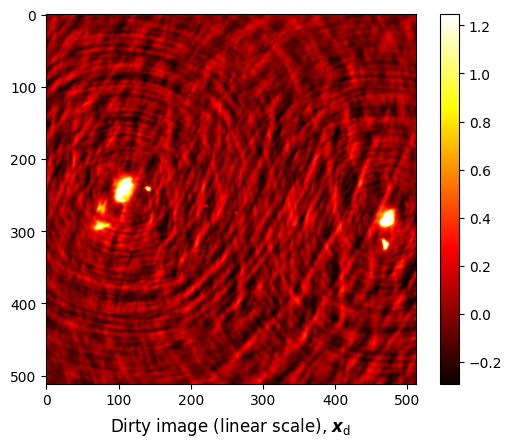

In [5]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

dirty = fits.getdata('results/3c353/dirty.fits')
dirty_upper_lim = np.percentile(dirty, 99.75)
dirty_lower_lim = np.percentile(dirty, 0.25)
dirty = np.clip(dirty, dirty_lower_lim, dirty_upper_lim)
fig, ax = plt.subplots()
pcm = ax.imshow(dirty, cmap='hot')
cb = plt.colorbar(pcm, ax=ax)
title = ax.set_title(r'Dirty image (linear scale), $\boldsymbol{x}_{\text{d}}$', y = -0.15)

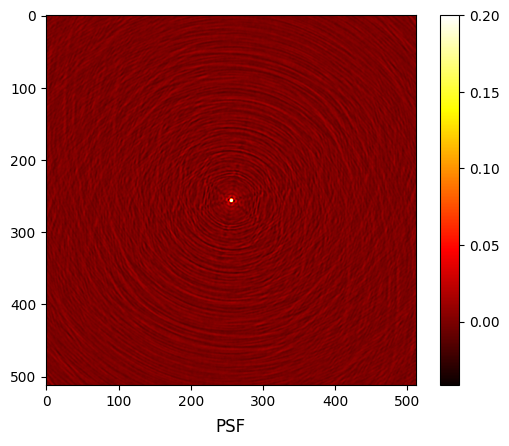

In [6]:
# Load PSF
psf = fits.getdata('results/3c353/psf.fits')
# Clip the PSF
psf = np.clip(psf, psf.min(), 0.2)
# Plot PSF
fig, ax = plt.subplots()
pcm = ax.imshow(psf, cmap='hot')
cb = plt.colorbar(pcm, ax=ax)
title = ax.set_title(r'PSF', y = -0.15)

R2D2 reconstructed images are saved in **.fits** format:
- The estimated model image $\widetilde{\boldsymbol{x}}$.
- The associated residual dirty image  $\widetilde{\boldsymbol{r}}$.

They can be visualised using the following Python code:

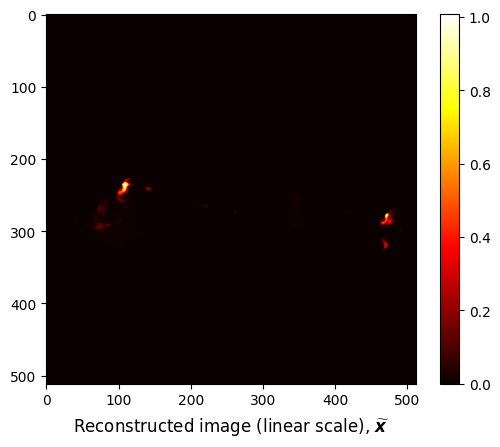

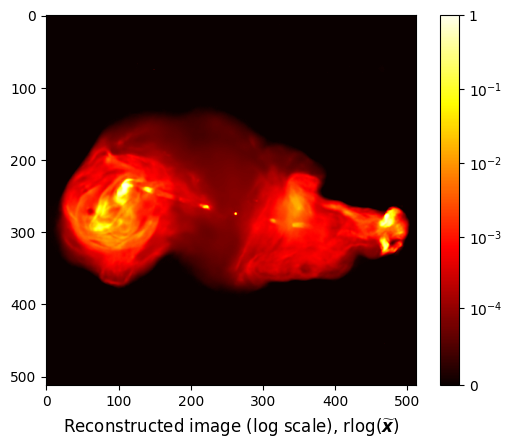

In [7]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

# Load R2D2 output
rec = fits.getdata('results/3c353/R2D2_model_image.fits')
# Plot R2D2 output in linear scale
fig, ax = plt.subplots()
pcm = ax.imshow(rec, cmap='hot')
cb = plt.colorbar(pcm, ax=ax)
title = ax.set_title(r'Reconstructed image (linear scale), $\widetilde{\boldsymbol{x}}$', y=-0.15)
# Image dynamic range
a = 1e5
# Plot R2D2 output in log scale
fig, ax = plt.subplots()
pcm = ax.imshow(rec, norm=rlog(a), cmap='hot')
cb = plt.colorbar(pcm, ax=ax)

ticks = [np.log10(a * tick + 1)/np.log10(a) for tick in [0, 1e-4, 1e-3, 1e-2, 1e-1, 1]]
ticks[-1] = 1
cb.set_ticks(ticks)
cb.set_ticklabels([0, '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '1'])
title = ax.set_title(r'Reconstructed image (log scale), $\text{rlog}(\widetilde{\boldsymbol{x}})$', y=-0.15)

We can also compute the below reconstruction evaluation metrics using the following Python code:

$\textrm{SNR}(\bar{x}, \widetilde{x}) = 20 \log_{10}\left(\frac{\|\bar{x}\|_2}{\|\bar{x} - \widetilde{x}\|_2}\right)$,


$\textrm{logSNR}(\bar{x}, \widetilde{x}) = \textrm{SNR}(\textrm{rlog}(\bar{x}), \textrm{rlog}(\widetilde{x}))$.

In [8]:
# Define SNR
def snr(x_gt, x_rec):
    return 20 * np.log10(np.linalg.norm(x_gt) / np.linalg.norm(x_gt - x_rec))

# Define logSNR
def log_im(im, a):
    return im.max() * np.log10(im.max() * im / a + 1)/ np.log10(a)

# Calculate evaluation metrics
SNR = snr(gdth, rec)
logSNR = snr(log_im(gdth, a), log_im(rec, a))
# Print evaluation metrics
print(f'Reconstruction metrics: SNR = {SNR:.3f} dB; logSNR = {logSNR:.3f} dB')

Reconstruction metrics: SNR = 36.484 dB; logSNR = 30.998 dB


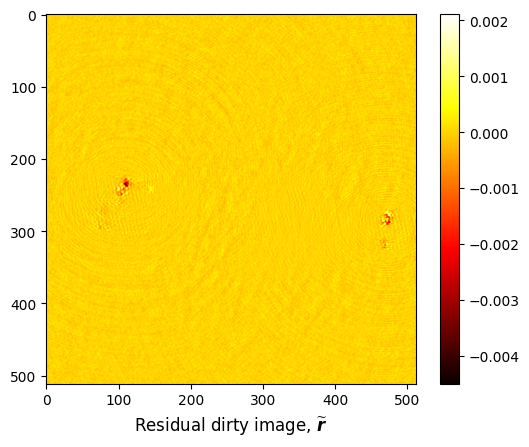

In [9]:
# Load residual dirty image
residual = fits.getdata('results/3c353/R2D2_normalised_residual_dirty_image.fits')
# Plot residual dirty image
fig, ax = plt.subplots()
pcm = ax.imshow(residual, cmap='hot')
cb = plt.colorbar(pcm, ax=ax)
title = ax.set_title(r'Residual dirty image, $\widetilde{\boldsymbol{r}}$', y = -0.15)